In [1]:
# By: Danyal Khattak

#%%

### Data Cleaning: Part - a

import pandas as pd

# Column names from description
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

# Loading the CSV file, specifying no header and assigning column names
bh = pd.read_csv('boston_housing_mid.csv', header=None, names=column_names)

# Displaying the top 5 lines 
print(bh.head())

# Displaying the number of rows and columns
print("Number of rows:", bh.shape[0])
print("Number of columns:", bh.shape[1])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2  
Number of rows: 506
Number of columns: 13


In [3]:
#%%
### Data Cleaning: Part - b

print(bh.dtypes)
bh['RAD'] = bh['RAD'].astype('float64')
bh['CHAS'] = bh['CHAS'].astype('bool')

print(bh.dtypes)

#%%
### Data Cleeaning: Part - c

# Identifying missing values and their counts
missing_values_count = bh.isna().sum()

# Displaying only attributes with missing values
print(missing_values_count[missing_values_count > 0])

# Making copies of the dataset for each of the method for removing the null values. 
bh_del_col = bh.copy()
bh_del_row = bh.copy()
bh_null_0 = bh.copy()
bh_null_ffill = bh.copy()

# 1. Dropping each column with a null value
bh_del_col.dropna(axis=1, inplace=True)
print(bh_del_col)
bh_del_col.info()


# 2. Dropping each row with a null value.
bh_del_row.dropna(inplace=True)
print(bh_del_row)
bh_del_row.info()


# 3. Replacing null values with 0.
bh_null_0.fillna(0, inplace=True)
print(bh_null_0)
bh_null_0.info()

# 4. Writing a function that replaces the null values with mean of 2 rows above and below the null value.  
bh_null_ffill['NOX'].fillna(method='ffill', inplace=True)
print(bh_null_ffill[['NOX']])  
bh_null_ffill.info()


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object
CRIM       float64
ZN         float64
INDUS      float64
CHAS          bool
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object
NOX    9
dtype: int64
        CRIM    ZN  INDUS   CHAS     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  False  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  False  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  False  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  False  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  False  7.147  54.2  6.0622  3.0  222.0 

C:\Users\danyal\AppData\Local\Temp\ipykernel_10364\345948671.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bh_null_ffill['NOX'].fillna(method='ffill', inplace=True)
C:\Users\danyal\AppData\Local\Temp\ipykernel_10364\345948671.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bh_null_ffill['NOX'].fillna(method='ffill', inplace=True)


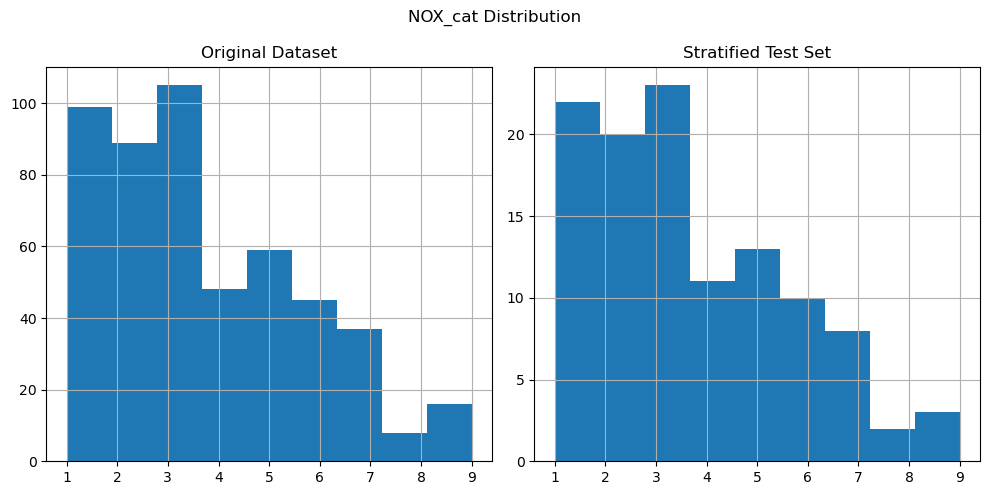

In [5]:
#%%
### Preparation for analysis: Part - a

## (I)
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# 1. Creating the 'NOX_cat' 
bh['NOX_cat'] = pd.cut(bh_null_ffill['NOX'], bins=9, labels=range(1, 10))

# 2. Using Stratified Shuffle Split on 'NOX_cat'
split = StratifiedShuffleSplit(n_splits=1, test_size=0.22, random_state=42) 
for train_index, test_index in split.split(bh, bh['NOX_cat']):
    bh_train_set = bh.loc[train_index]
    bh_test_set = bh.loc[test_index]
    

## (II)
import pandas as pd
import matplotlib.pyplot as plt

# Creating histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bh['NOX_cat'].hist(bins=9) 
plt.title('Original Dataset')

plt.subplot(1, 2, 2)
bh_test_set['NOX_cat'].hist(bins=9) 
plt.title('Stratified Test Set')

plt.suptitle("NOX_cat Distribution")
plt.tight_layout() 
plt.show()

In [7]:
## (III)

# Proportions in the training set
train_proportions = bh_train_set['NOX_cat'].value_counts() / len(bh_train_set)

# Proportions in the Original set
test_proportions = bh_test_set['NOX_cat'].value_counts() / len(bh_test_set)

# Printing for comparison
print("Training Set Proportions:\n", train_proportions)
print("Test Set Proportions:\n", test_proportions)

Training Set Proportions:
 NOX_cat
3    0.208122
1    0.195431
2    0.175127
5    0.116751
4    0.093909
6    0.088832
7    0.073604
9    0.032995
8    0.015228
Name: count, dtype: float64
Test Set Proportions:
 NOX_cat
3    0.205357
1    0.196429
2    0.178571
5    0.116071
4    0.098214
6    0.089286
7    0.071429
9    0.026786
8    0.017857
Name: count, dtype: float64


In [9]:
## (IV)

# Removing 'NOX_cat' column
for set_ in (bh, bh_train_set, bh_test_set): 
    set_.drop("NOX_cat", axis=1, inplace=True)

# Printing shapes
print("Shape of Training Set:", bh_train_set.shape)
print("Shape of Test Set:", bh_test_set.shape)
print("Shape of Original Dataset:", bh.shape)

# Calculating the ratio of the length of the test set to that of the original
test_set_ratio = len(bh_test_set) / len(bh) * 100
print("Test Set Ratio:", test_set_ratio, "%") 

Shape of Training Set: (394, 13)
Shape of Test Set: (112, 13)
Shape of Original Dataset: (506, 13)
Test Set Ratio: 22.134387351778656 %


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.186537  0.379372 -0.063797  0.396729 -0.207662  0.331825   
ZN      -0.186537  1.000000 -0.540667 -0.026805 -0.525674  0.320130 -0.579054   
INDUS    0.379372 -0.540667  1.000000  0.028686  0.764408 -0.381656  0.651198   
CHAS    -0.063797 -0.026805  0.028686  1.000000  0.042122  0.138022  0.072604   
NOX      0.396729 -0.525674  0.764408  0.042122  1.000000 -0.293309  0.728589   
RM      -0.207662  0.320130 -0.381656  0.138022 -0.293309  1.000000 -0.229835   
AGE      0.331825 -0.579054  0.651198  0.072604  0.728589 -0.229835  1.000000   
DIS     -0.357263  0.668310 -0.714410 -0.084822 -0.774972  0.201964 -0.739799   
RAD      0.598757 -0.309119  0.578287 -0.015607  0.605749 -0.211404  0.447761   
TAX      0.555610 -0.313000  0.711441 -0.056360  0.667556 -0.297227  0.506261   
PTRATIO  0.264702 -0.407008  0.387405 -0.126705  0.200920 -0.379213  0.282943   
LSTAT    0.430031 -0.403616 

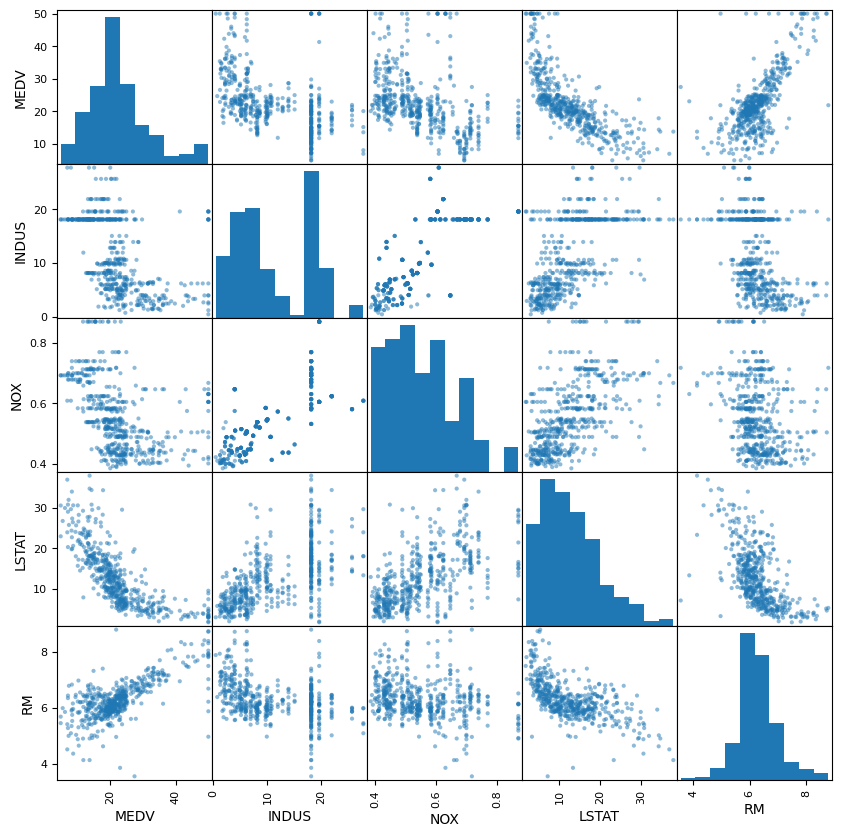

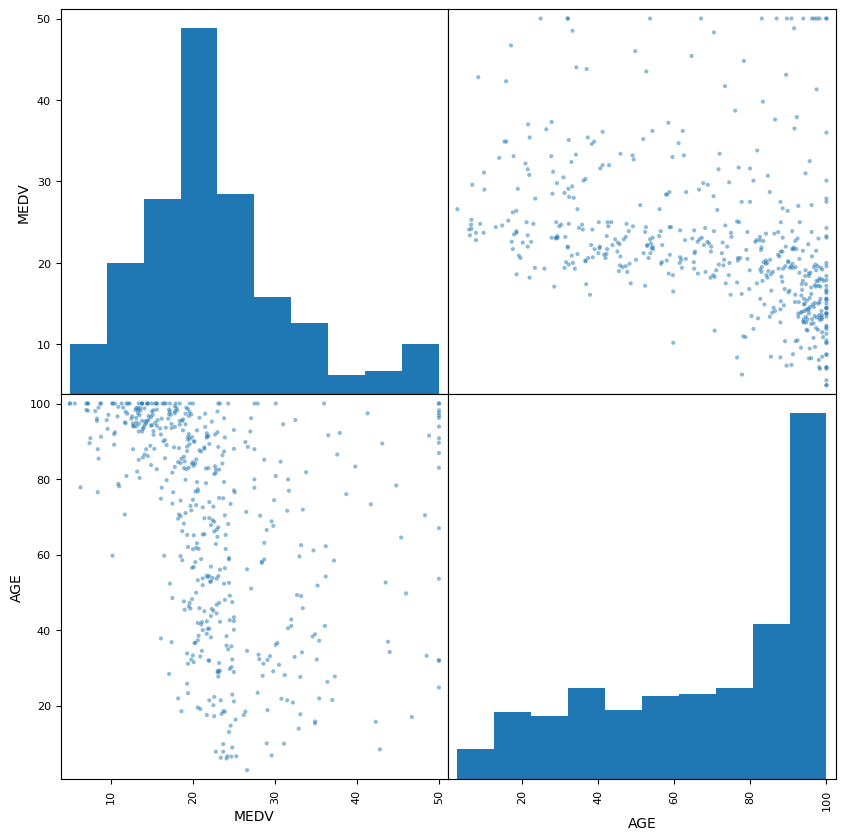

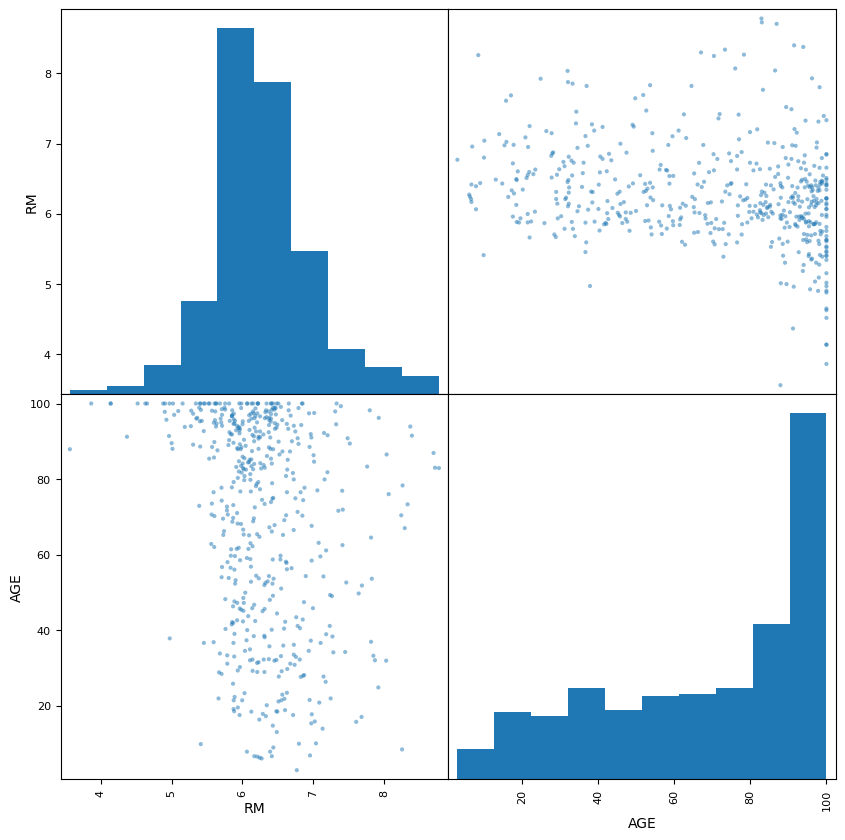

In [11]:
#%%
### Data Analysis



## (I)
correlation_matrix = bh_train_set.corr()
print(correlation_matrix)



## (II)
# Calculating correlations with 'MEDV'
correlation_medv = bh_train_set.corr()['MEDV']

# Sorting in descending order
MEDV_sorted_correlations = correlation_medv.sort_values(ascending=False)

print(MEDV_sorted_correlations)



## (III)
MEDV_Scatter = ['MEDV', 'INDUS', 'NOX','LSTAT','RM']

# Creating the scatter matrix for MEDV, INDUS, NOX, LSTAT, and RM
pd.plotting.scatter_matrix(bh[MEDV_Scatter], figsize=(10, 10))
plt.show()



## (IV)
AGE_Scatter = ['MEDV', 'AGE']

# Creating the scatter matrix for MEDV vs AGE
pd.plotting.scatter_matrix(bh[AGE_Scatter], figsize=(10, 10))
plt.show()


## (IV)
AGE_RM_Scatter = ['RM', 'AGE']

# Creating the scatter matrix for RM and AGE
pd.plotting.scatter_matrix(bh[AGE_RM_Scatter], figsize=(10, 10))
plt.show()

